# Quality Wine Prediction

### The dataset was downloaded from Kaggle. It is a prediction model to determine if the quality of wine is good or not.

# Importing the dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Data Collection and Processing

In [2]:
# Loading the dataset to pandas dataframe

Wine_data = pd.read_csv("C:\\Users\\LENOVO USER\\OneDrive\\Desktop\\WineQT.csv")

In [3]:
# Let's preview the first five rows of our data

Wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
# Let's preview the last five rows of our data

Wine_data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595
1142,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1597


In [5]:
# Let's check the number of rows and columns in our data

Wine_data.shape

(1143, 13)

In [6]:
# Let's check if there are missing values in our data

Wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [7]:
# Let's see the columns of our data

Wine_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [8]:
# Let's equally check if there are any duplicates in our data

print(Wine_data.duplicated())

0       False
1       False
2       False
3       False
4       False
        ...  
1138    False
1139    False
1140    False
1141    False
1142    False
Length: 1143, dtype: bool


In [9]:
# Let's get the information about our data

Wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


# Data Analysis and Visualization

In [10]:
# Let's get the statistical measures of our data

Wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


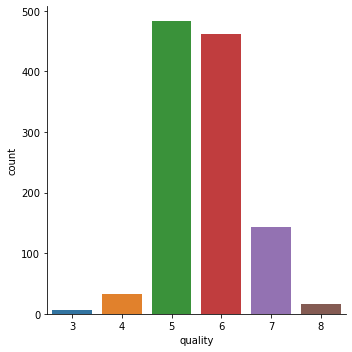

In [11]:
# Let's check the number of values for each quality

sns.catplot(x = 'quality', data = Wine_data, kind = 'count')

### 5 is the most occuring quality values in our data

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

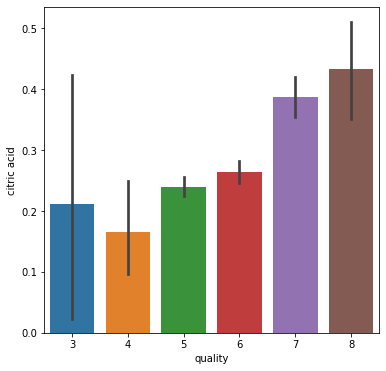

In [12]:
# Let compare between 'citric acid' and 'quality' values

plot = plt.figure(figsize = (6,6))
sns.barplot(x = 'quality', y = 'citric acid', data = Wine_data)

### As seen, if the wine crtric acid is low, the wine quality will be high. Citric acid is directly proportional to quality.

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

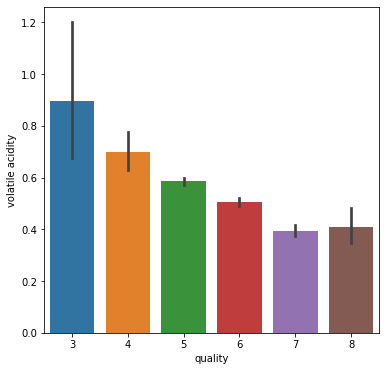

In [13]:
# Let compare between 'volatile acidity' and 'quality' values

plot = plt.figure(figsize = (6,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = Wine_data)

### If the wine volatile acidity is high, the wine quality will be low. They are inversely proportional to each other.

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

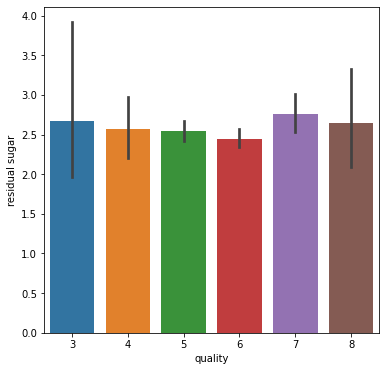

In [14]:
# Let compare between 'residual sugar' and 'quality' values

plot = plt.figure(figsize = (6,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = Wine_data)

### If the wine residual sugar is high, the wine quality will be high too.

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

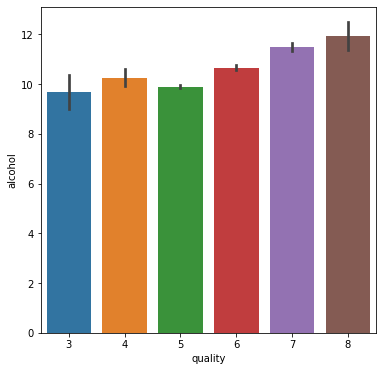

In [15]:
# Let compare between 'alcohol' and 'quality' values

plot = plt.figure(figsize = (6,6))
sns.barplot(x = 'quality', y = 'alcohol', data = Wine_data)

### If the alcohol contained in the wine is low, then the wine quality will be high.

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

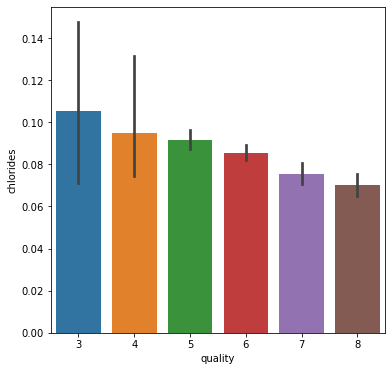

In [16]:
# Let compare between 'chlorides' and 'quality' values

plot = plt.figure(figsize = (6,6))
sns.barplot(x = 'quality', y = 'chlorides', data = Wine_data)

### If the chlorides content in the wine is high, then the quality of the wine will be low.

<AxesSubplot:xlabel='quality', ylabel='pH'>

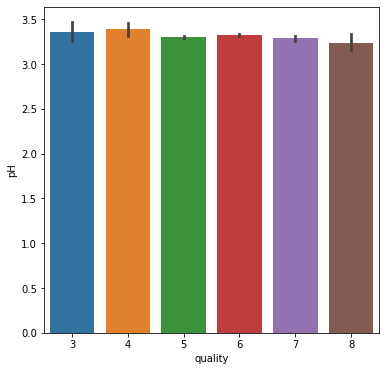

In [17]:
# Let compare between 'pH' and 'quality' values

plot = plt.figure(figsize = (6,6))
sns.barplot(x = 'quality', y = 'pH', data = Wine_data)

### if the pH content contained in the wine is high, then the wine quality will be low too.

# Correlation

### Positive Correlation
### Negative Correlation

In [18]:
correlation = Wine_data.corr()

In [19]:
# Let's get the correlation values

print(correlation['quality'])

fixed acidity           0.121970
volatile acidity       -0.407394
citric acid             0.240821
residual sugar          0.022002
chlorides              -0.124085
free sulfur dioxide    -0.063260
total sulfur dioxide   -0.183339
density                -0.175208
pH                     -0.052453
sulphates               0.257710
alcohol                 0.484866
quality                 1.000000
Id                      0.069708
Name: quality, dtype: float64


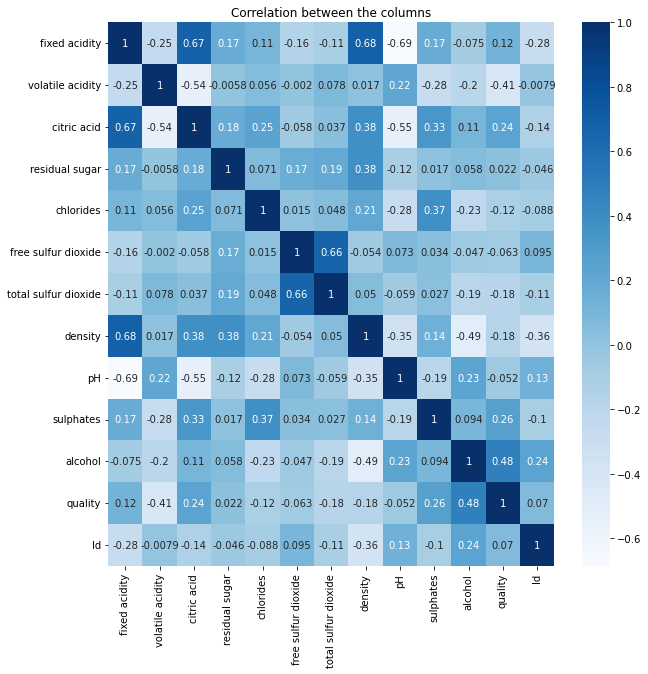

In [20]:
# Let's construct a heatmap to understand the correlation between the columns

plt.figure(figsize = (10,10))
sns.heatmap(Wine_data.corr(), annot = True, cmap = 'Blues')
plt.title('Correlation between the columns')
plt.show()

# Data Preprocessing

In [21]:
# Let's drop the feature not needed for our prediction

Wine_data.drop('Id', axis = 1, inplace = True)

In [22]:
# Let's separate the feature and the target variables

X = Wine_data.drop('quality', axis = 1)


In [23]:
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  

# Label Binarization

In [24]:
# Let make label <6 to 1 and labels >7 to 0B

Y = Wine_data['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

In [25]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1138    0
1139    0
1140    0
1141    0
1142    0
Name: quality, Length: 1143, dtype: int64


# Splitting Training and Test data

In [26]:
# Let's split the data into training and test data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [27]:
# Let's check the numver of train and test data we have

print(Y.shape, Y_train.shape, Y_test.shape)

(1143,) (914,) (229,)


# Model Training---------> Random Forest Classifier

In [28]:
model = RandomForestClassifier()

In [29]:
model.fit(X_train, Y_train)

RandomForestClassifier()

# Model Evaluation

### Accuracy Score

In [30]:
# Accuracy on test data

X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [31]:
print('Accuracy Score : ', test_data_accuracy)

Accuracy Score :  0.9126637554585153


### This is a good accuracy score which means out of 100 predicts, our model can predict 92 values correctly.

# Building a Predictive System

### The quality of the wine is not good--------------> 0

### The quality of the wine is good--------------------> 1

In [32]:
input_data = (7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4)

# let's change the input data to a numpy arrary
input_data_as_numpy_arrary = np.asarray(input_data)

# Let's reshape the numpy arrary as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_arrary.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

[0]


C:\Users\LENOVO USER\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


### We can see our model predicted [0] which means the quality of the wine is not good.